In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
def recoverTransformation(Image1, Image2):
    plt.figure()
    plt.imshow(Image1)
    points_1=plt.ginput(6, timeout=120)
    plt.show()
    
    plt.figure()
    plt.imshow(Image2)
    points_2=plt.ginput(6, timeout=120)
    plt.show()


    points_1=np.array(points_1)
    points_2=np.array(points_2)
    
    locs_1=points_1
    locs_2=points_2
    
    # Construct A matrix from selected locations of original image
    A= np.zeros((2*locs_1.shape[0], 6))

    for count, i in enumerate(range(0, A.shape[0], 2)):

        A[i,:]=   np.concatenate((locs_1[count,:], np.array([1,0,0,0])) , axis=0 )
        A[i+1,:]= np.concatenate(( np.array([0,0,0]) , locs_1[count,:] , np.array([1]) ) , axis=0 )

        
    # Getting y vector from corresponding locations in transformed image    
    y= locs_2.reshape((-1,1))

    
    # Getting transformation matrix
    A_pinv =  np.linalg.pinv(A)
    x= np.matmul(A_pinv,y)
    T = x.reshape(2,3) # transformation matrix
    
    
    # Applying affine transformation on original image
    T_Image= cv.warpAffine( Image1, T , (Image2.shape[1], Image2.shape[0]  ) )
    
    plt.imshow(T_Image)
    
    # Getting MSE between intensities of Image2 and transformed image
    MSEPix= np.mean( (T_Image-Image2)**2 )
    
    
    # Getting MSE between corresponding locations of Image2 and transformed locations
    T_points= np.matmul(T,  np.vstack( (locs_1.T, np.ones((1, locs_1.T.shape[1]))) ))
    MSECorPts = np.mean( (T_points-locs_2.T)**2 )
    
    
    return MSEPix, MSECorPts, T, T_Image
    

In [3]:
def registerImages(ImageNew, ImageOld):
           
        
        MSEPix, MSECorPts, T, T_Image= recoverTransformation(ImageOld, ImageNew)
        

        mask_old= np.ones((ImageOld.shape))

        mask_new = cv.warpAffine( mask_old, T , (ImageNew.shape[1], ImageNew.shape[0]  ) )

        registeredImage = ((1-mask_new)*ImageNew).astype("uint8") + (mask_new*T_Image).astype("uint8")
        plt.imshow(registeredImage)

        return registeredImage, MSEPix, MSECorPts, T, T_Image

# Badshahi Masjid

In [7]:
old=plt.imread('dataset/badshahiOld.jpg')
new=plt.imread('dataset/badshahiNew.JPG')

In [8]:
image,MSEPix,MSECorpts,T,T_Image=registerImages(new,old)
print("MSEPix: ",MSEPix)
print("MSECorpts: ",MSECorpts)
print("Transformation Matrix ",T)

MSEPix:  99.58275953389831
MSECorpts:  5.4021963579155825
Transformation Matrix  [[ 1.64894591e+00 -6.19141020e-03  2.08530376e+02]
 [ 5.04582741e-02  1.60545598e+00 -1.87102752e+01]]


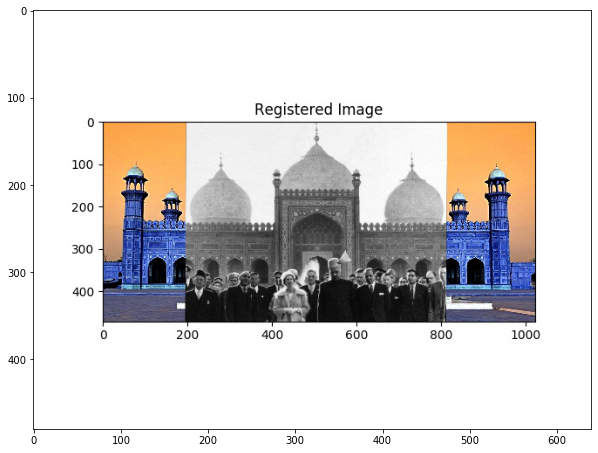

In [13]:
old=plt.imread('Result/badshahi_registered.jpg')
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(old)